In [33]:
import pandas as pd #untuk baca dataset
import numpy as np #untuk tabular


# import seaborn as sns
# import matplotlib.pylab as plt

In [34]:
data = pd.read_excel("ispu.xlsx")
data

,NO,Tanggal,pm10,pm25,so2,co,o3,no2,hc,status
0,695,2023-10-01 00:00:00,71.71,84.65,11.47,5.73,8.48,9.91,8.60,sedang
1,694,2023-10-01 01:00:00,71.57,84.62,11.36,5.74,8.46,9.91,8.73,sedang
2,693,2023-10-01 02:00:00,73.21,85.15,11.29,5.76,8.38,9.94,9.10,sedang
3,692,2023-10-01 03:00:00,73.44,85.62,11.29,5.76,8.36,10.09,9.23,sedang
4,691,2023-10-01 04:00:00,73.07,86.00,11.38,5.80,8.34,10.24,9.08,sedang
...,...,...,...,...,...,...,...,...,...,...
690,5,2023-10-31 19:00:00,35.50,35.48,11.06,5.61,9.17,3.13,8.33,baik
691,4,2023-10-31 20:00:00,46.00,52.84,22.60,5.64,7.92,6.88,6.67,sedang
692,3,2023-10-31 21:00:00,39.50,38.71,13.94,3.20,8.75,11.25,6.67,baik
693,2,2023-10-31 22:00:00,39.00,32.26,13.94,2.31,9.58,11.25,6.67,baik


In [35]:
jumlah_fitur = data.shape[1]

print("Jumlah fitur: ", jumlah_fitur)

Jumlah fitur:  10


In [36]:
jumlah_data = data.shape[0]

print("Jumlah data: ", jumlah_data)

Jumlah data:  695


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NO       695 non-null    int64  
 1   Tanggal  695 non-null    object 
 2   pm10     695 non-null    float64
 3   pm25     695 non-null    float64
 4   so2      695 non-null    float64
 5   co       695 non-null    float64
 6   o3       695 non-null    float64
 7   no2      695 non-null    float64
 8   hc       695 non-null    float64
 9   status   695 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 54.4+ KB


In [38]:
# Missing Value Check
data.isna().sum()

NO         0
Tanggal    0
pm10       0
pm25       0
so2        0
co         0
o3         0
no2        0
hc         0
status     0
dtype: int64

In [39]:
# Drop columns that are not needed (e.g., NO and Tanggal)
data = data.drop(columns=['NO', 'Tanggal'])

In [40]:
X = data[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'hc']].values
y = data['status'].values

In [41]:
def normalize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0) #minmax scaler

In [42]:
X_normalized = normalize(X)

In [43]:
status_mapping = {'baik': 0, 'sedang': 1, 'tidak sehat': 2, 'sangat tidak sehat': 3, 'berbahaya': 4}
data['status'] = data['status'].map(status_mapping)

In [44]:
X = data.drop(columns=['status']).values
y = data['status'].values

<Axes: >

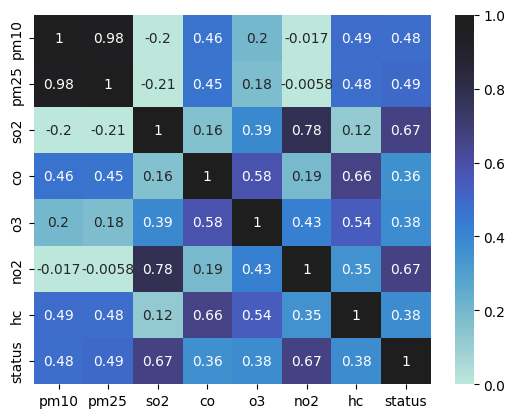

In [45]:
# Coleration Matrix Check
sns.heatmap(data.corr(),annot=True,vmin=0, vmax=1, center=True)

In [46]:
jumlah_fitur = data.shape[1]

print("Jumlah fitur: ", jumlah_fitur)

Jumlah fitur:  8


In [47]:
jumlah_data = data.shape[0]

print("Jumlah data: ", jumlah_data)

Jumlah data:  695


In [48]:
data.groupby('status').mean()

,pm10,pm25,so2,co,o3,no2,hc
status,,,,,,,
0,29.291121,26.642018,9.268969,3.612197,8.295919,4.379372,5.770090
1,56.682173,64.986005,10.363855,4.596542,9.415491,6.898178,7.267827
2,88.690833,101.388750,31.727500,7.698333,14.137083,9.792917,13.427083
3,58.300000,63.257778,198.097778,6.194444,15.621111,22.844444,12.483333
4,27.542727,25.360000,305.560000,5.948182,20.850909,31.662727,8.922727


In [49]:
full_data = data.values

# Data Standardization

In [50]:
test_size = 0.2
train_set = {0: [], 1: [], 2: [], 3: [], 4: []}
test_set = {0: [], 1: [], 2: [], 3: [], 4: []}

In [51]:
for category in status_mapping.values():
    category_data = full_data[full_data[:, -1] == category]
    split_index = int((1 - test_size) * len(category_data))
    train_set[category] = category_data[:split_index, :-1].tolist()
    test_set[category] = category_data[split_index:, :-1].tolist()

In [52]:
# train_data = full_data[:-int(test_size * len(full_data))]
# test_data = full_data[-int(test_size * len(full_data)):]

In [53]:
# for i in train_data:
#     train_set[i[-1]].append(i[:-1])

# for i in test_data:
#     test_set[i[-1]].append(i[:-1])


In [54]:
def knn_predict(train_set, test_set, k):
    y_true = []
    y_pred = []

    for label in test_set:
        for test_point in test_set[label]:
            distances = []
            for train_label in train_set:
                for train_point in train_set[train_label]:
                    distance = np.linalg.norm(np.array(train_point) - np.array(test_point))
                    distances.append((distance, train_label))
            distances.sort(key=lambda x: x[0])
            k_nearest_labels = [distances[i][1] for i in range(k)]
            most_common = np.bincount(k_nearest_labels).argmax()
            y_true.append(label)
            y_pred.append(most_common)

    return np.array(y_true), np.array(y_pred)

In [55]:
# best_k = None
# best_accuracy = 0.0
accuracy_results = []

In [56]:
# for k in range(1, 20):
#     y_true, y_pred = knn_predict(train_set, test_set, k)

#     accuracy = np.mean(y_pred == y_true)

#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_k = k


In [57]:
# print(f'Best K: {best_k}, Accuracy: {best_accuracy:.2f}')
for k in range(1, 20):
    y_true, y_pred = knn_predict(train_set, test_set, k)

    accuracy = np.mean(y_pred == y_true)

    accuracy_results.append((k, accuracy))

    print(f'\nK: {k}, Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    report = classification_report(y_true, y_pred, target_names=[list(status_mapping.keys())[i] for i in np.unique(y_true)])
    print('\nClassification Report:')
    for entry in report:
        print(f"{entry['label']: <20} Precision: {entry['precision']:.2f}  Recall: {entry['recall']:.2f}  F1-score: {entry['f1-score']:.2f}  Support: {entry['support']}")


K: 1, Accuracy: 0.96
Confusion Matrix:
[[44  1  0  0  0]
 [ 2 84  0  0  0]
 [ 0  1  4  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  0  3]]

Classification Report:
baik                 Precision: 0.96  Recall: 0.98  F1-score: 0.97  Support: 45
sedang               Precision: 0.98  Recall: 0.98  F1-score: 0.98  Support: 86
tidak sehat          Precision: 0.67  Recall: 0.80  F1-score: 0.73  Support: 5
sangat tidak sehat   Precision: 0.00  Recall: 0.00  F1-score: 0.00  Support: 2
berbahaya            Precision: 1.00  Recall: 1.00  F1-score: 1.00  Support: 3

K: 2, Accuracy: 0.94
Confusion Matrix:
[[45  0  0  0  0]
 [ 5 81  0  0  0]
 [ 0  1  4  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  0  3]]

Classification Report:
baik                 Precision: 0.90  Recall: 1.00  F1-score: 0.95  Support: 45
sedang               Precision: 0.99  Recall: 0.94  F1-score: 0.96  Support: 86
tidak sehat          Precision: 0.67  Recall: 0.80  F1-score: 0.73  Support: 5
sangat tidak sehat   Precision: 0.00  Recall: 0.00  F1

In [58]:
# y_true, y_pred = knn_predict(train_set, test_set, k)
# y_true, y_pred = knn_predict(train_set, test_set, best_k)
best_k, best_accuracy = max(accuracy_results, key=lambda x: x[1])
print(f'\nBest K: {best_k}, Accuracy: {best_accuracy:.2f}')


Best K: 3, Accuracy: 0.97


In [59]:
y_true, y_pred = knn_predict(train_set, test_set, best_k)

In [60]:
accuracy = np.mean(y_pred == y_true)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [61]:
def confusion_matrix(y_true, y_pred):
    unique_labels = np.unique(y_true)
    matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)

    for true_label, pred_label in zip(y_true, y_pred):
        matrix[true_label][pred_label] += 1

    return matrix

In [62]:
def classification_report(y_true, y_pred, target_names):
    unique_labels = np.unique(y_true)
    report = []

    for label in unique_labels:
        tp = np.sum((y_true == label) & (y_pred == label))
        fp = np.sum((y_true != label) & (y_pred == label))
        fn = np.sum((y_true == label) & (y_pred != label))
        tn = np.sum((y_true != label) & (y_pred != label))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (fn + tp) if (fn + tp) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        report.append({
            "label": target_names[label],
            "precision": precision,
            "recall": recall,
            "f1-score": f1_score,
            "support": tp + fn
        })

    return report

In [63]:
unique_test_labels = np.unique(y_true)
missing_classes = [label for label in status_mapping.values() if label not in unique_test_labels]

if missing_classes:
    print(f"Peringatan: Kategori berikut tidak ada dalam data uji: {missing_classes}")

In [64]:
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[45  0  0  0  0]
 [ 1 85  0  0  0]
 [ 0  1  4  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  0  3]]


In [66]:
# target_names = [list(status_mapping.keys())[i] for i in np.unique(y_true)]
# report = classification_report(y_true, y_pred, target_names)

# print('\nClassification Report:')
# for entry in report:
#     print(f"{entry['label']: <20} Precision: {entry['precision']:.2f}  Recall: {entry['recall']:.2f}  F1-score: {entry['f1-score']:.2f}  Support: {entry['support']}")